In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from processing_functions import *

df = pd.read_csv('data/input_file.csv')

In [17]:
nan_percentage(df) 

NaN % Unnamed: 0: 0.00%
NaN % iid: 0.00%
NaN % id: 0.01%
NaN % wave: 0.00%
NaN % partner: 0.00%
NaN % pid: 0.12%
NaN % match: 0.00%
NaN % int_corr: 1.89%
NaN % age_o: 1.24%
NaN % pf_o_att: 1.06%
NaN % pf_o_sin: 1.06%
NaN % pf_o_int: 1.06%
NaN % pf_o_fun: 1.17%
NaN % pf_o_amb: 1.28%
NaN % pf_o_sha: 1.54%
NaN % dec_o: 0.00%
NaN % attr_o: 2.53%
NaN % sinc_o: 3.43%
NaN % intel_o: 3.65%
NaN % fun_o: 4.30%
NaN % amb_o: 8.62%
NaN % shar_o: 12.84%
NaN % like_o: 2.98%
NaN % prob_o: 3.80%
NaN % met_o: 4.60%
NaN % age: 1.13%
NaN % imprelig: 0.94%
NaN % goal: 0.94%
NaN % date: 1.16%
NaN % go_out: 0.94%
NaN % sports: 0.94%
NaN % tvsports: 0.94%
NaN % exercise: 0.94%
NaN % dining: 0.94%
NaN % museums: 0.94%
NaN % art: 0.94%
NaN % hiking: 0.94%
NaN % gaming: 0.94%
NaN % clubbing: 0.94%
NaN % reading: 0.94%
NaN % tv: 0.94%
NaN % theater: 0.94%
NaN % movies: 0.94%
NaN % concerts: 0.94%
NaN % music: 0.94%
NaN % shopping: 0.94%
NaN % yoga: 0.94%
NaN % exphappy: 1.21%
NaN % expnum: 78.52%
NaN % attr_impor

There is a lot of data missing for how people think others perceive them, and what attributes they think the rest of their sex prefer. 

Since I am also going to be working with no gender, I will drop these columns.

The attribute that overall has the most amount of missing data is 'shared interests'. I was hoping to use this attribute as a reliable feature to find partners, but based on the findings made in the EDA it is the feature that is the least important. 

In [32]:
def drop_columns(df, suffix):
    cols = [col for col in df.columns if any(col.endswith(s) for s in suffix)]
    
    df = df.drop(columns=cols, errors='ignore')
    
    return df
    

suffix= ['_fellow_want', 'perceived', '_o_want', '_diff']
df = drop_columns(df, suffix)
df = df.drop(columns=['Unnamed: 0'])

In [33]:
df

,iid,id,wave,partner,pid,match,int_corr,age_o,pf_o_att,pf_o_sin,...,amb_self,dec,attr,sinc,intel,fun,amb,shar,like,prob
0,1,1.0,1,1,11.0,0,0.14,27.0,35.0,20.0,...,4,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,1.0,1,2,12.0,0,0.54,22.0,60.0,0.0,...,4,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,1.0,1,3,13.0,1,0.16,22.0,19.0,18.0,...,4,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,1,1.0,1,4,14.0,1,0.61,23.0,30.0,5.0,...,4,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,1.0,1,5,15.0,1,0.21,24.0,30.0,10.0,...,4,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,21,18,526.0,0,0.64,26.0,10.0,10.0,...,3,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0
8374,552,22.0,21,19,527.0,0,0.71,24.0,50.0,20.0,...,2,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0
8375,552,22.0,21,20,528.0,0,-0.46,29.0,40.0,10.0,...,3,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0
8376,552,22.0,21,21,529.0,0,0.62,22.0,10.0,25.0,...,3,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0


In [34]:
# Dropping identifier columns and irrelevant features for prediction
df = df.drop(columns=['iid', 'id', 'pid', 'partner', 'wave'], axis=1)

In [35]:
df

,match,int_corr,age_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,...,amb_self,dec,attr,sinc,intel,fun,amb,shar,like,prob
0,0,0.14,27.0,35.0,20.0,20.0,20.0,0.0,5.0,0,...,4,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,0,0.54,22.0,60.0,0.0,0.0,40.0,0.0,0.0,0,...,4,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,0.16,22.0,19.0,18.0,19.0,18.0,14.0,12.0,1,...,4,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,1,0.61,23.0,30.0,5.0,15.0,40.0,5.0,5.0,1,...,4,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,0.21,24.0,30.0,10.0,20.0,10.0,10.0,20.0,1,...,4,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,0.64,26.0,10.0,10.0,30.0,20.0,10.0,15.0,1,...,3,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0
8374,0,0.71,24.0,50.0,20.0,10.0,5.0,10.0,5.0,0,...,2,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0
8375,0,-0.46,29.0,40.0,10.0,30.0,10.0,10.0,NaN,0,...,3,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0
8376,0,0.62,22.0,10.0,25.0,25.0,10.0,10.0,20.0,1,...,3,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0


In [21]:
X = df.drop(['match', 'dec', 'dec_o'], axis=1)
y = df['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

AttributeError: 'NoneType' object has no attribute 'drop'

In [13]:
# start by modelling a lightgbm model (I want to try different models and compare them after)
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42)

lgb_model.fit(X_train, y_train)

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: age_diff: object

 95%|=================== | 1595/1676 [00:11<00:00]       

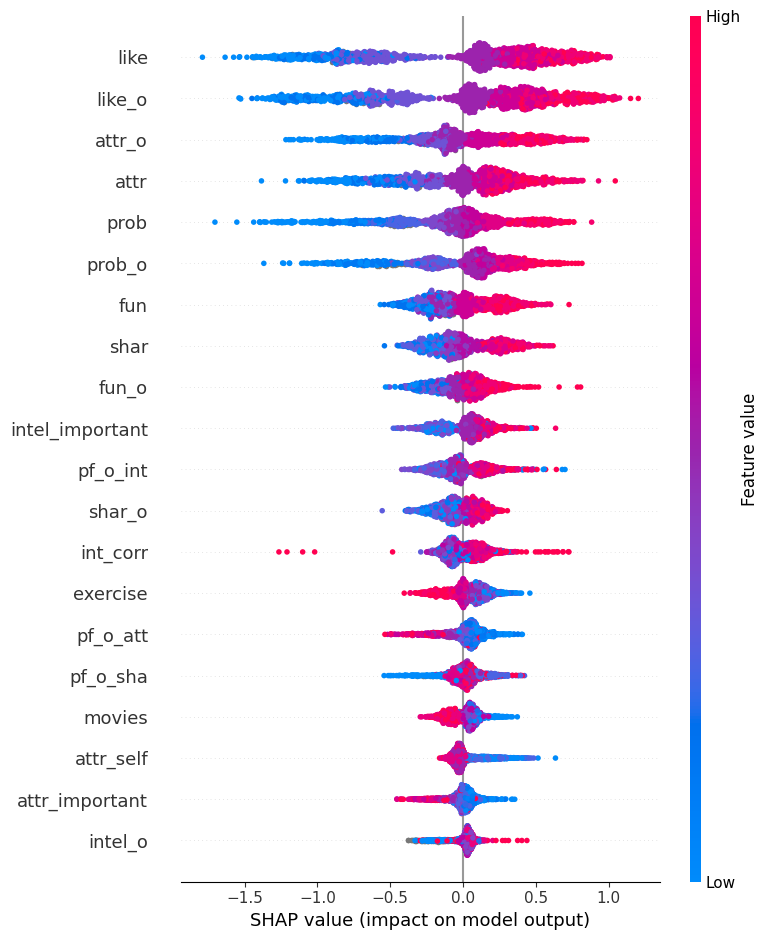

In [40]:
import shap

explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)